<a href="https://colab.research.google.com/github/Viiiin94/ondevice_ai_python/blob/main/colab/AI_exam02_introduction_of_Deeplearning2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class add_graph:
  def __init__(self):
    pass

  def forward(self, x, y):
    out = x + y
    return out

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy

backward : 미분
  - dx = x에 대한 미분
  - dy = y에 대한 미분

In [ ]:
class mul_graph:
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out

  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx, dy

In [ ]:
class mse_graph:
  def __init__(self):
    self.loss = None
    self.x = None
    self.y = None
    self.t = None

  def forward(self, y, t):
    self.t = t # 모델의 예측 값
    self.y = y # 모델의 결과 값
    self.loss = np.mean((self.y - self.t)**2)
    return self.loss

  def backward(self, x, dout = 1):
    data_size = self.t.shape[0]
    dweight_mse = (((self.y - self.t) * x).sum() * 2) / data_size
    dbias_mse = ((self.y - self.t).sum() * 2) / data_size
    return dweight_mse, dbias_mse

In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

In [ ]:
mul_apple_graph = mul_graph()
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [ ]:
apple_price = mul_apple_graph.forward(apple, apple_num)
orange_price = mul_orange_graph.forward(orange, orange_num)
all_price = add_apple_orange_graph.forward(apple_price, orange_price)
total_price = mul_tax_graph.forward(all_price, tax)
print(total_price)

715.0000000000001


715.0000000000001가 나온 이유

# 부동소수점 표현 방식
- Python은 실수를 IEEE 754 표준에 따라 저장
- 컴퓨터는 소수를 2진수로 변환해서 저장하는데, 일부 십진 소수는 2진수로 정확히 표현할 수 없음

In [ ]:
dprice = 1
dtax, dall_price = mul_tax_graph.backward(dprice)
dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)
dorange_num, dorange = mul_orange_graph.backward(dorange_price)
dapple_num, dapple = mul_apple_graph.backward(dapple_price)

print(dapple, dapple_num, dorange, dorange_num, dtax)

65000 1300 97500 1950 1.1


In [ ]:
def celsius_to_fahrenheit(x):
  return x * 1.8 + 32

In [ ]:
weight = np.random.uniform(0, 5, 1)
print(weight)
bias = 0

[4.62488633]


In [ ]:
data_C = np.arange(0, 100)
data_F = celsius_to_fahrenheit(data_C)

# min - max scaling
# scaled_data_C = (data_C - data_C.min()) / (data_C.max() - data_C.min())
# scaled_data_F = (data_F - data_F.min()) / (data_F.max() - data_F.min())

# 이 전이랑 비교하기 위해서 100으로 나눔
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_C.shape)
print(scaled_data_F)
print(scaled_data_F.shape)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
(100,)
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.74

# 튜플에 값을 하나만 넣고 싶을 때
- a = (100,)
- print(type(a))

In [ ]:
weight_graph = mul_graph()
bias_graph = add_graph()

In [ ]:
weight_data_C = weight_graph.forward(weight, scaled_data_C)
predict_data = bias_graph.forward(weight_data_C, bias)
print(predict_data)

[0.         0.04624886 0.09249773 0.13874659 0.18499545 0.23124432
 0.27749318 0.32374204 0.36999091 0.41623977 0.46248863 0.5087375
 0.55498636 0.60123522 0.64748409 0.69373295 0.73998181 0.78623068
 0.83247954 0.8787284  0.92497727 0.97122613 1.01747499 1.06372386
 1.10997272 1.15622158 1.20247045 1.24871931 1.29496817 1.34121704
 1.3874659  1.43371476 1.47996363 1.52621249 1.57246135 1.61871022
 1.66495908 1.71120794 1.75745681 1.80370567 1.84995453 1.8962034
 1.94245226 1.98870112 2.03494999 2.08119885 2.12744771 2.17369658
 2.21994544 2.2661943  2.31244317 2.35869203 2.40494089 2.45118976
 2.49743862 2.54368748 2.58993635 2.63618521 2.68243407 2.72868294
 2.7749318  2.82118066 2.86742953 2.91367839 2.95992725 3.00617612
 3.05242498 3.09867384 3.14492271 3.19117157 3.23742043 3.2836693
 3.32991816 3.37616702 3.42241589 3.46866475 3.51491361 3.56116248
 3.60741134 3.6536602  3.69990907 3.74615793 3.79240679 3.83865566
 3.88490452 3.93115338 3.97740225 4.02365111 4.06989997 4.1161488

In [ ]:
dout = 1
dbias, dweighted_data = bias_graph.backward(dout)
print(dbias)
dweight, dscaled_data = weight_graph.backward(dweighted_data)
print(dweight)

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [ ]:
mseGraph = mse_graph()
mse = mseGraph.forward(predict_data, scaled_data_F)
print(mse)

1.827703363302303


In [ ]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
print(weight_mse_gradient)
print(bias_mse_gradient)

1.538302856189653
2.1566374716426933


In [ ]:
learning_rate = 0.1

In [ ]:
learned_weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
print(weight, learned_weight)
print(bias, learned_bias)

[4.62488633] [4.54874034]
0 -0.21566374716426934


In [ ]:
error_list = []
weight_list = []
bias_list = []
for i in range(1000):
  #forward
  weight_data_C = weight_graph.forward(weight, scaled_data_C)
  predict_data = bias_graph.forward(weight_data_C, bias)
  #backward
  dout = 1
  dbias, dweighted_data = bias_graph.backward(dout)
  dweight, dscaled_data = weight_graph.backward(dweighted_data)
  #mse
  mse = mseGraph.forward(predict_data, scaled_data_F)
  error_list.append(mse)
  #mse gradient
  weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
  #learning
  weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
  bias = bias - learning_rate * bias_mse_gradient * dbias
  weight_list.append(weight)
  bias_list.append(bias)
print(weight, bias)

[1.80164557] 0.3191544666205441


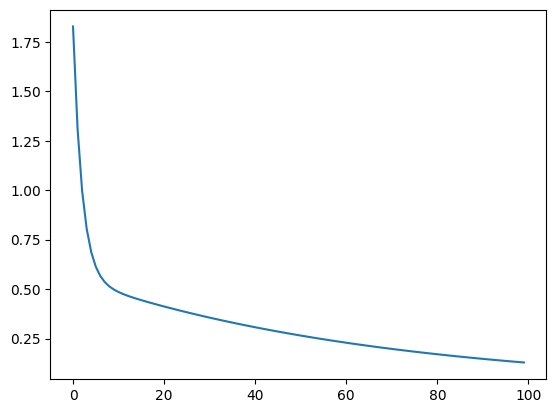

In [ ]:
import matplotlib.pyplot as plt
plt.plot(error_list[:100])
plt.show()

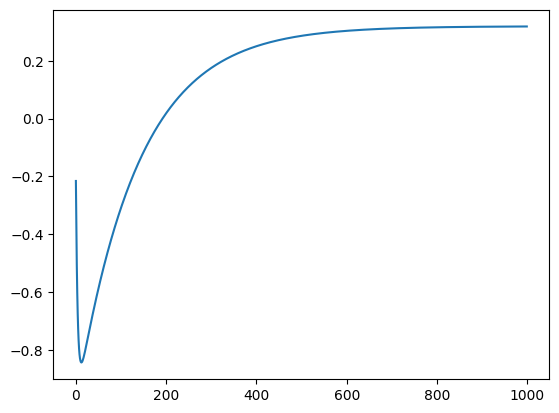

In [ ]:
plt.plot(bias_list)
plt.show()